In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random as random
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
random.seed(0)
# create a KNN model for the merged_filtered_data_crc.csv file
# Load the dataset

data = pd.read_csv("merged.csv")

In [30]:
def KNN(target_variable='msi_status', test_size=0.2, random_state=42, neighbors=5, do_pca=False, do_cross=False, do_smote=False):
    y = data[target_variable]
    X = data.drop(target_variable, axis=1)
    le = LabelEncoder()
    # Fit and transform the features
    X = X.apply(le.fit_transform)

    # Apply PCA
    if do_pca != False:
        pca = PCA(n_components=do_pca)
        X = pca.fit_transform(X)

    # Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=neighbors)

    if do_cross == False:
        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        if do_smote:
            smote = SMOTE(random_state=random_state)
            X_train, Y_train = smote.fit_resample(X_train, Y_train)
            
        # Train the model
        knn.fit(X_train, Y_train)
        # Make predictions on the test set
        y_pred = knn.predict(X_test)
        # Evaluate the model
        accuracy = accuracy_score(Y_test, y_pred)
        return accuracy
    else: 
        # Perform cross-validation
        if do_smote:
            smote = SMOTE(random_state=random_state)
            X, y = smote.fit_resample(X, y)
        scores = cross_val_score(knn, X, y, cv=do_cross)
        # Print the cross-validation scores
        return scores.mean()


In [35]:
number_of_neighbors_list = [x for x in range(1, 51, 2)]
PCA_list = [2, 4, 6, 8, 10]
training_size = [x / 100 for x in range(10, 100, 10)]
cross_validation_list = [x for x in range(2, 11)]

# number_of_neighbors_list = [x for x in range(1, 14, 4)]
# PCA_list = [2, 4]
# training_size = [x / 100 for x in range(10, 100, 30)]
# cross_validation_list = [x for x in range(3, 12, 5)]

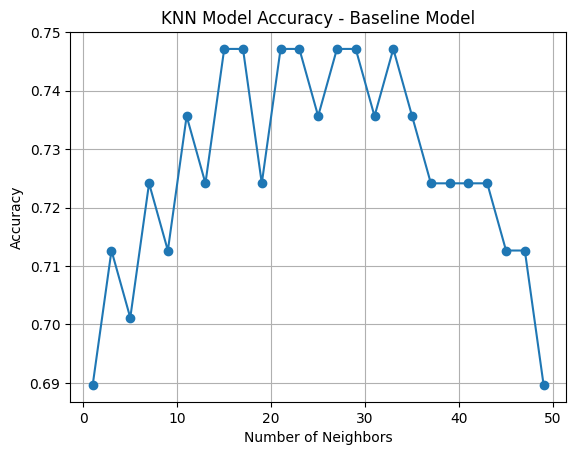

In [32]:
baseline_accuracy_scores = []
baseline_neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i)
    baseline_accuracy_scores.append(accuracy)
    baseline_neighbour_values.append(i)
plt.plot(baseline_neighbour_values, baseline_accuracy_scores, marker='o')
    
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy - Baseline Model')
plt.grid(True)
plt.show()

PCA =  2
PCA =  4
PCA =  6
PCA =  8
PCA =  10


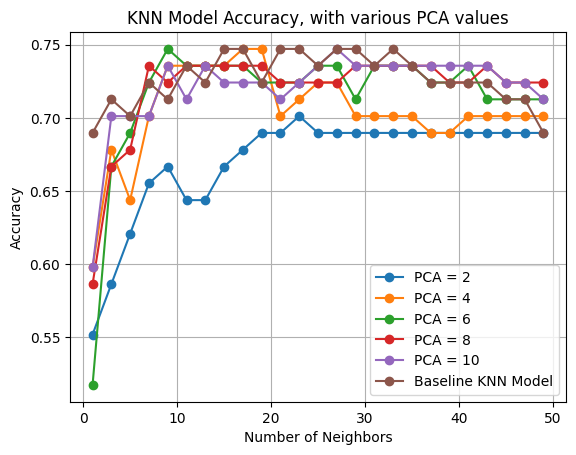

In [36]:
for j in PCA_list:
    print("PCA = ", j)
    accuracy_scores = []
    neighbour_values = []
    for i in number_of_neighbors_list:
        accuracy = KNN(neighbors=i, do_pca = j)
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)

    plt.plot(neighbour_values, accuracy_scores, marker='o', label='PCA = ' + str(j))
plt.plot(baseline_neighbour_values, baseline_accuracy_scores, marker='o', label="Baseline KNN Model")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, with various PCA values')
plt.legend()
plt.grid(True)
plt.show()

PCA =  2
PCA =  4
PCA =  6
PCA =  8
PCA =  10
PCA =  False


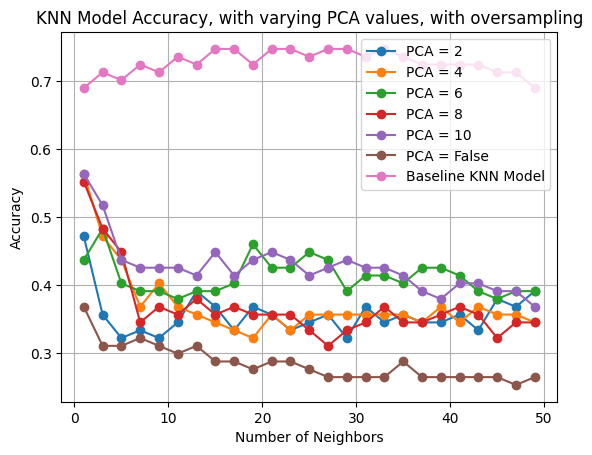

In [37]:
PCA_list = [2, 4, 6, 8, 10, False]
for j in PCA_list:
    print("PCA = ", j)
    accuracy_scores = []
    neighbour_values = []
    for i in number_of_neighbors_list:
        accuracy = KNN(neighbors=i, do_pca = j, do_smote=True)
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)

    plt.plot(neighbour_values, accuracy_scores, marker='o', label='PCA = ' + str(j))
plt.plot(baseline_neighbour_values, baseline_accuracy_scores, marker='o', label="Baseline KNN Model")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, with varying PCA values, with oversampling')
plt.legend()
plt.grid(True)
plt.show()

PCA =  2
PCA =  4
PCA =  6
PCA =  8
PCA =  10
PCA =  False


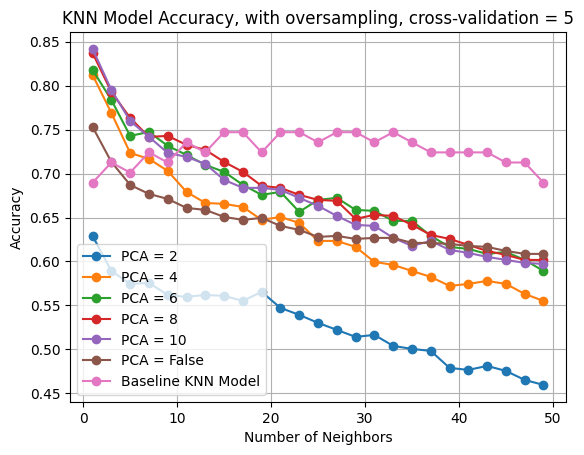

In [38]:
for j in PCA_list:
    print("PCA = ", j)
    accuracy_scores = []
    neighbour_values = []
    for i in number_of_neighbors_list:
        accuracy = KNN(neighbors=i, do_pca = j, do_smote=True, do_cross=5)
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)

    plt.plot(neighbour_values, accuracy_scores, marker='o', label='PCA = ' + str(j))
plt.plot(baseline_neighbour_values, baseline_accuracy_scores, marker='o', label="Baseline KNN Model")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, with oversampling, cross-validation = 5')
plt.legend()
plt.grid(True)
plt.show()

cross validation =  2
cross validation =  4
cross validation =  6
cross validation =  8
cross validation =  10


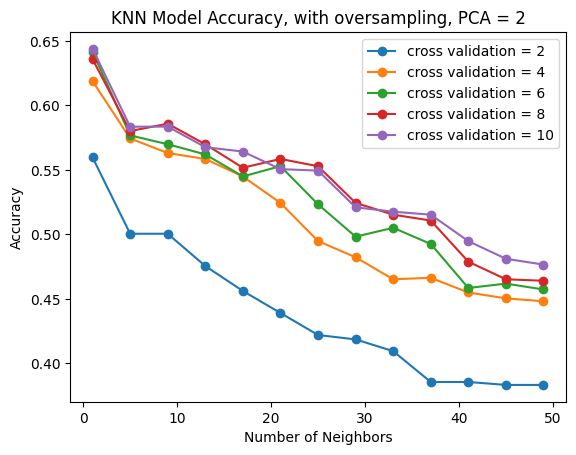

In [7]:
for j in cross_validation_list:
    print("cross validation = ", j)
    accuracy_scores = []
    neighbour_values = []
    for i in number_of_neighbors_list:
        accuracy = KNN(neighbors=i, do_smote=True, do_cross=j, do_pca=2)
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)

    plt.plot(neighbour_values, accuracy_scores, marker='o', label='cross validation = ' + str(j))
plt.plot(baseline_neighbour_values, baseline_accuracy_scores, marker='o', label="Baseline KNN Model")

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, with oversampling, PCA = 2')
plt.legend()
plt.grid(True)
plt.show()

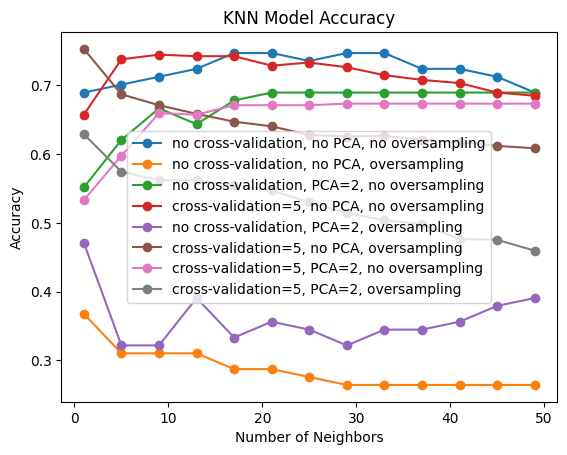

In [8]:
accuracy_scores = []
neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i, do_cross=False, do_pca=False, do_smote=False)
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)
plt.plot(neighbour_values, accuracy_scores, marker='o', label="no cross-validation, no PCA, no oversampling")

accuracy_scores = []
neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i, do_cross=False, do_pca=False, do_smote=True)
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)
plt.plot(neighbour_values, accuracy_scores, marker='o', label="no cross-validation, no PCA, oversampling")

accuracy_scores = []
neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i, do_cross=False, do_pca=2, do_smote=False)
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)
plt.plot(neighbour_values, accuracy_scores, marker='o', label="no cross-validation, PCA=2, no oversampling")

accuracy_scores = []
neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i, do_cross=5, do_pca=False, do_smote=False)
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)
plt.plot(neighbour_values, accuracy_scores, marker='o', label="cross-validation=5, no PCA, no oversampling")

accuracy_scores = []
neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i, do_cross=False, do_pca=2, do_smote=True)
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)
plt.plot(neighbour_values, accuracy_scores, marker='o', label="no cross-validation, PCA=2, oversampling")

accuracy_scores = []
neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i, do_cross=5, do_pca=False, do_smote=True)
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)
plt.plot(neighbour_values, accuracy_scores, marker='o', label="cross-validation=5, no PCA, oversampling")

accuracy_scores = []
neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i, do_cross=5, do_pca=2, do_smote=False)
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)
plt.plot(neighbour_values, accuracy_scores, marker='o', label="cross-validation=5, PCA=2, no oversampling")

accuracy_scores = []
neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i, do_cross=5, do_pca=2, do_smote=True)
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)
plt.plot(neighbour_values, accuracy_scores, marker='o', label="cross-validation=5, PCA=2, oversampling")

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, with various combinations of PCA, oversampling, and cross-validation')
plt.grid(True)
plt.figsize(10, 10)
plt.show()

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 43, n_neighbors = 45

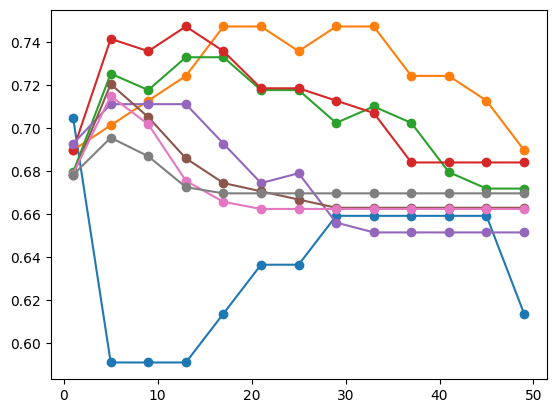

In [9]:
for j in training_size:
    accuracy_scores = []
    neighbour_values = []
    for i in number_of_neighbors_list:
        accuracy = KNN(neighbors=i, test_size=j)
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)
        
    plt.plot(neighbour_values, accuracy_scores, marker='o', label='Test Size = ' + str(j))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, with training dataset size = ' + str(j))
plt.show()

In [ ]:
for j in PCA_list:
    accuracy_scores = []
    neighbour_values = []
    for i in number_of_neighbors_list:
        accuracy = KNN(neighbors=i, do_pca = j, do_cross=5)
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)

    plt.plot(neighbour_values, accuracy_scores, marker='o', label='PCA = ' + str(j))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, cross validation = 5')
plt.show()

In [ ]:
accuracy_scores = []
neighbour_values = []
for i in number_of_neighbors_list:
    accuracy = KNN(neighbors=i, do_cross=5)
    accuracy_scores.append(accuracy)
    neighbour_values.append(i)

plt.plot(neighbour_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, With No PCA, cross validation = 5')
plt.show()

In [ ]:
number_of_neighbors = 55
training_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for j in training_size:
    accuracy_scores = []
    neighbour_values = []
    for i in range(3, number_of_neighbors+1, 2):
        accuracy = KNN(neighbors=i, test_size=j, do_cross=5)
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)

    plt.plot(neighbour_values, accuracy_scores, marker='o')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.title('KNN Model Accuracy, no PCA, with cross validation dataset size = ' + str(j))
    plt.show()